## Tutorial on how to use S-grids with time-evolving depth dimensions

Some hydrodynamic models (such as SWASH) have time-evolving depth dimensions, for example because they follow the waves on the free surface. Parcels can work with these types of models, but it is a bit involved to set up. That is why we explain here how to run Parcels on `FieldSets` with time-evoloving depth dimensions

In [1]:
%matplotlib inline
from parcels import FieldSet, ParticleSet, JITParticle, AdvectionRK4, ParticleFile, plotTrajectoriesFile
import numpy as np
from datetime import timedelta as delta
from os import path

Here, we use sample data from the SWASH model. We first set the `filenames` and `variables`

In [2]:
filenames = path.join('SWASH_data', 'field_*.nc')
variables = {'U': 'cross-shore velocity',
             'V': 'along-shore velocity',
             'depth_u': 'time varying depth_u'}

Now, the first key step when reading time-evolving depth dimensions is that we specify `depth` as **`'not_yet_set'`** in the `dimensions` dictionary

In [3]:
dimensions = {'U': {'lon': 'x', 'lat': 'y', 'depth': 'not_yet_set', 'time': 't'},
              'V': {'lon': 'x', 'lat': 'y', 'depth': 'not_yet_set', 'time': 't'},
              'depth_u': {'lon': 'x', 'lat': 'y', 'depth': 'not_yet_set', 'time': 't'}}

Then, _after_ we create the `FieldSet` object, we set the `depth` dimension of the relevant `Fields` to `fieldset.depth_u` and `fieldset.depth_w`, using the `Field.set_depth_from_field()` method

In [4]:
fieldset = FieldSet.from_netcdf(filenames, variables, dimensions, mesh='flat', allow_time_extrapolation=True)
fieldset.U.set_depth_from_field(fieldset.depth_u)
fieldset.V.set_depth_from_field(fieldset.depth_u)

Now, we can create a ParticleSet, run those and plot them

INFO: Compiled JITParticleAdvectionRK4 ==> /var/folders/r2/8593q8z93kd7t4j9kbb_f7p00000gr/T/parcels-504/6c662dabb803077cfcabb1b87d3c87bb_0.so


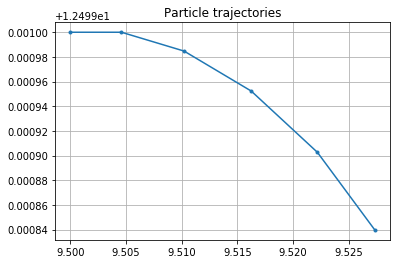

In [5]:
pset = ParticleSet(fieldset, JITParticle, lon=9.5, lat=12.5, depth=-0.1)
pfile = pset.ParticleFile("SwashParticles", outputdt=delta(seconds=0.05))
pset.execute(AdvectionRK4, dt=delta(seconds=0.005), output_file=pfile)

pfile.export()  # export the trajectory data to a netcdf file
plotTrajectoriesFile('SwashParticles.nc');

Note that, even though we use 2-dimensional `AdvectionRK4`, the particle still moves down, because the grid itself moves down